# Library

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
import pandas as pd
import numpy as np
import scipy as sp
import re

import statsmodels
import statsmodels.api as sm
from scipy.stats import ttest_1samp, bartlett, levene, shapiro, probplot, norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Linear Regression

선형회귀모델는 종속변수 Y를 독립변수 X들 간의 선형결합으로 설명하고자 하는 모델 <br>
여기서 선형결합은 **독립변수 X 간의 선형 관계가 아니라 X의 회귀계수 간의 선형관계** 의미 <br>

<br>

ex) Linear Model

$ Y = \beta_0 + \beta_1X_1 + \epsilon $ <br>
$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2^2 + \epsilon $ <br>
$ Y = \beta_0 + \beta_1X_1 + \beta_2log(X_2) + \epsilon $ <br>

<br>

ex) Non-linear model

$ Y = \beta_0 + \beta_1X_1 + e^{\beta_2X_2} + \epsilon $

<br>

## OLS (Ordinary Least Square)

선형 모델의 파라미터를 추정하는 방법

**선형회귀모델의 추정 방법 중 하나로 선형회귀모델 자체는 아님**

# Data

sklearn 패키지의 datasets 패키지는 회귀분석용 예제 제공 <br>
load_boston()은 보스턴 주택 가격 데이터 예측을 위한 데이터 셋 <br> 보스턴의 506개 타운 13개 독립변수 값으로 해당 타운의 주택가격 중앙값을 예측. 

> 독립변수 <br>
CRIM: 범죄율 <br>
INDUS: 비소매상업지역 면적 비율 <br>
NOX: 일산화질소 농도 <br>
RM: 주택당 방 수 <br>
LSTAT: 인구 중 하위 계층 비율 <br>
B: 인구 중 흑인 비율 <br>
PTRATIO: 학생/교사 비율 <br>
ZN: 25,000 평방피트를 초과 거주지역 비율 <br>
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0 <br>
AGE: 1940년 이전에 건축된 주택의 비율 <br>
RAD: 방사형 고속도로까지의 거리 <br>
DIS: 직업센터의 거리 <br>
TAX: 재산세율 <br>

>종속변수 <br>
보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

In [5]:
data = pd.read_pickle('./data/boston.pickle')

In [10]:
print(data.get('DESCR'))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
boston = pd.DataFrame(data.get('data'), columns=data.get('feature_names'))
boston['target'] = data.get('target')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## EDA

데이터 분석 전 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정 <br>
주로 시각화를 통한 방법을 사용 <br>
<br>

최소한 아래의 내용 확인 <br>
- 데이터의 이상치, 결측치 등을 확인
- 데이터의 분포가 어떠한지 확인
- 데이터 간 패턴 등을 파악
- 다중 공선성 파악

In [21]:
# null check
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [25]:
# duplicates check
boston.duplicated().sum()

0

In [26]:
# summarize statstics
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
# corr
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: xlabel='RM', ylabel='target'>

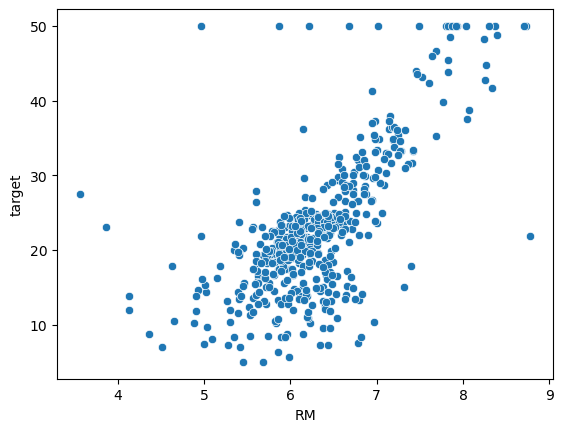

In [29]:
sns.scatterplot(
    boston,
    x='RM',
    y='target'
)

<Axes: xlabel='LSTAT', ylabel='target'>

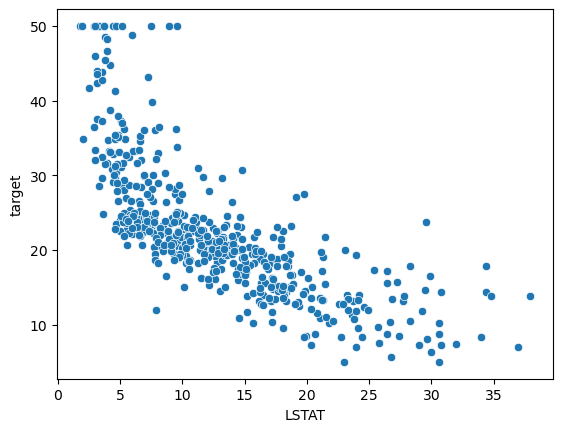

In [30]:
sns.scatterplot(
    boston,
    x='LSTAT',
    y='target'
)

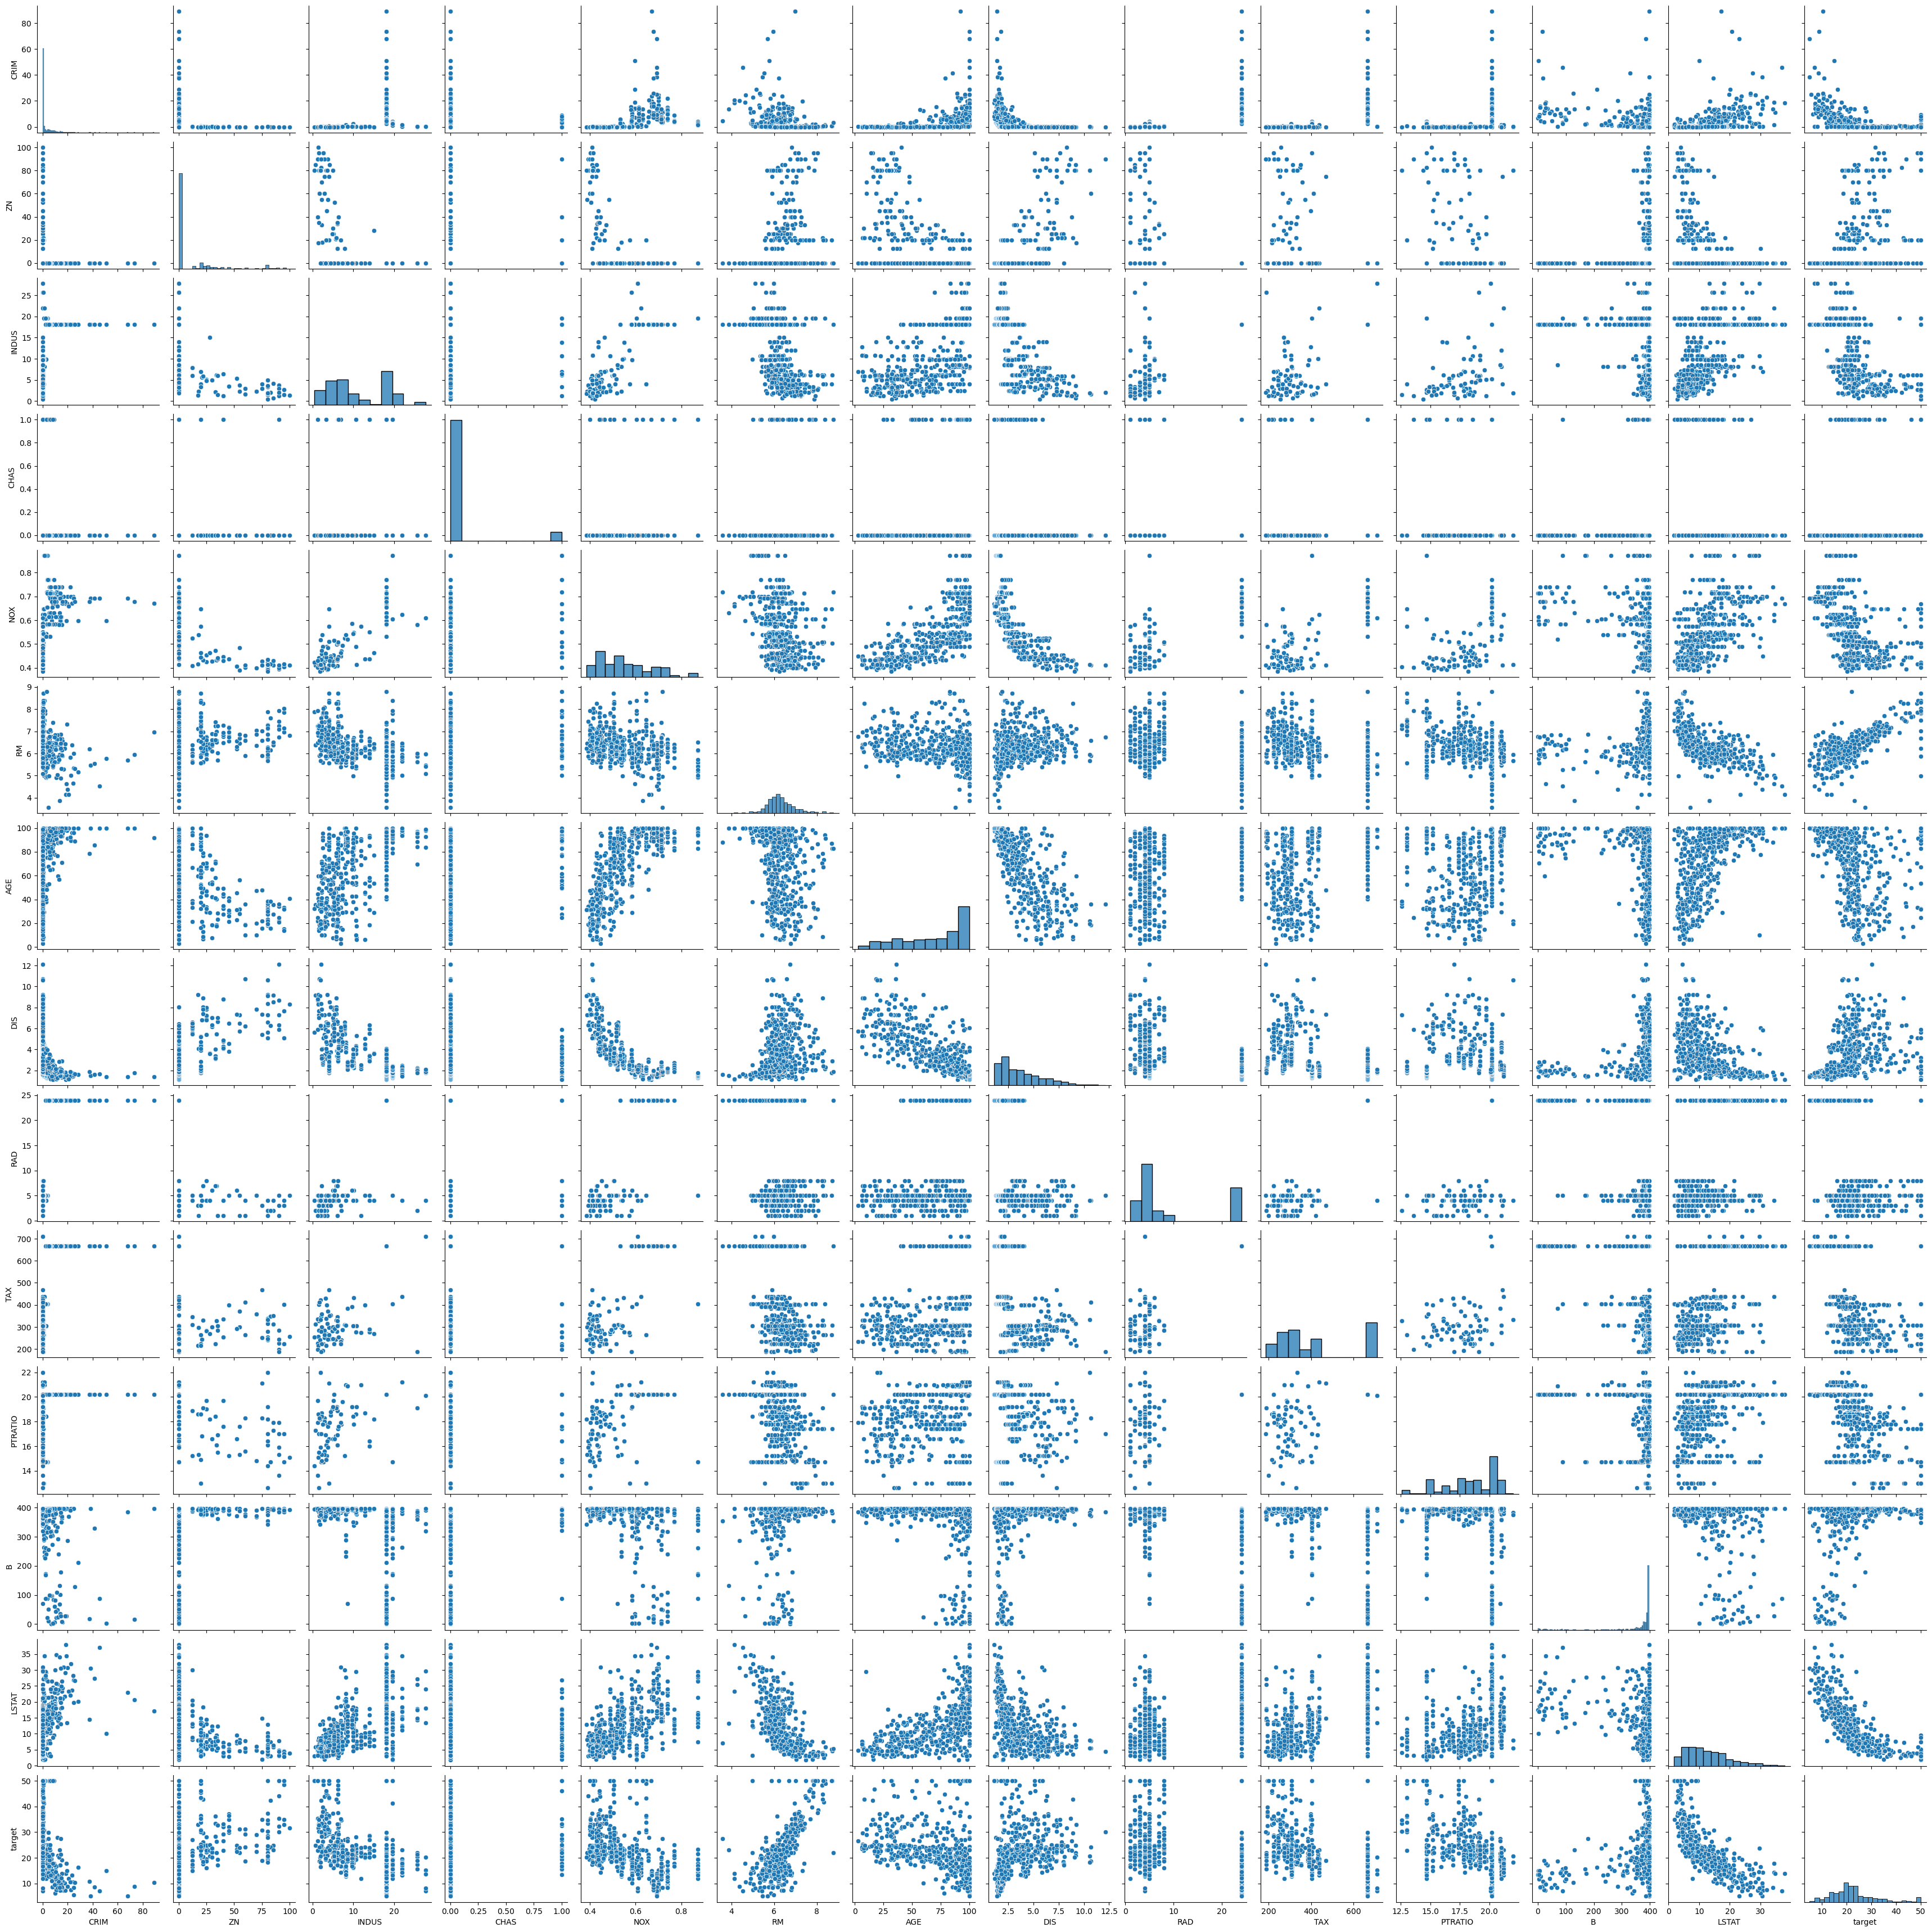

In [31]:
sns.pairplot(boston)

<Axes: >

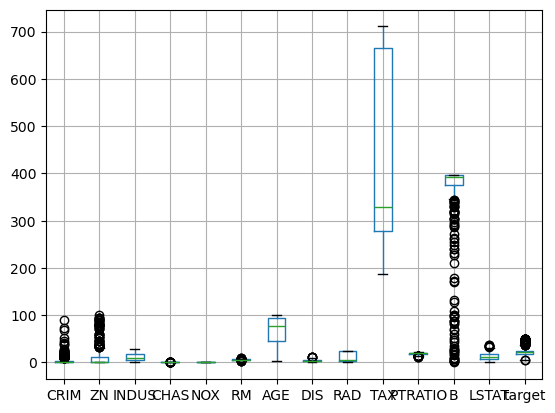

In [32]:
boston.boxplot()

# 통계적 회귀분석

$Y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + .. + \beta_kX_{ki} +\epsilon_i, \quad i=1, 2, 3, ..., n$
  - $Y_i$: 종속변수 $Y$의 i번째 관측값
  - $\beta_0, \beta_1, ..., \beta_k$: 모집단 회귀계수
    - $\beta_0$: 절편
    - $\beta_1, \beta_2, ..., \beta_k$: 기울기
  - $X_{ki}$: 독립변수 $X_k$의 i번째 관측값
  - $\epsilon_i$: i번째 확률오차항 또는 교란항

<br>

목적: 최소제곱법을 통해 **n개의 관측값을 이용하여 $\beta_0, \beta_1, ..., \beta_k$을 추정**하는 것

<br>

모형 추정 시 아래의 가정을 만족해야 함
1. 오차항의 평균은 0
2. 오차항은 등분산을 갖음
3. 오차항은 서로 독립
4. $X_i$는 상수. 즉, 확률변수가 아님
5. 오차항은 정규분포를 따름
6. 독립변수들($X_1, X_2, ..., X_k$)은 선형종속이 아님
- 위의 가정은 모형 적합 이후 오차 분석이라는 항목을 통해 오차에 대한 가설 검점
- 1~4는 최소제곱추정량이 최량선형불편추정량이(BLUE) 되기 위해서 필요
- 5는 회귀계수에 대한 신뢰구간추정 및 가설검정을 하기 위해 필요
- 6은 다중공선성 문제로 인하여 필요

<br>

**Equation**

$ Y_i = \beta_0 + \Sigma_1^n\beta_iX_i + \epsilon_i $ <br>
$ \epsilon_i = Y_i - \beta_0 - \Sigma_1^n\beta_iX_i $ <br>

$ min\ \Sigma^n_{i=1} \epsilon_i^2 = min\ \Sigma^n_{i=1}(Y_i - \beta_0 - \Sigma_{l=1}^k\beta_lX_l)^2 $ <br>
$ min\ (Y-X\beta)^T(Y-X\beta) $ (벡터 표현)


## Modeling

모델을 구축하는 과정으로 EDA를 통해 확인한 내용을 반영하여 모델 구축 <br>

statsmodel에서 두 가지 방법으로 사용 가능
```python
model = sm.OLS(y, x).fit()
```

```python
model = sm.OLS.from_formula("y ~ x", data).fit()
```
<br>

위의 from_formula는 다양한 활용 가능 <br>
- scale 
```python
model = sm.OLS.from_formula("y ~ scale(x)", data).fit()
```
- $x^2$
```python
model = sm.OLS.from_formula("y ~ I(x ** 2)", data).fit()
```
- 범주화
```python
model = sm.OLS.from_formula("y ~ C(x)", data).fit()
```
<br>



모델 결과는 아래의 내용으로 해석
- R-squared
설명하고자 하는 y를 주어진 독립변수로 얼마 정도 설명할 수 있는지 나타내는 지표 <br>
범위는 0에서 1사이의 값으로 0이면 모델의 설명력이 전혀 없는 상태이고, 1에 가까울수록 모델이 데이터를 잘 설명
- Adj. R-squared
R-squared와 내용은 같으나 R-square는 독립변수가 유의한지 아닌지와 간계 없이 추가할수록 값이 증가한다는 단점이 있음 <br>
이러한 단점을 보완하기 위해 독립변수의 숫자로 R-square 값을 보정
- F-statistic
모형의 적합도를 나타내는 통계량
- Prob (F-statistic) 
위에서 구한 F-statistic의 확률값 <br>
유의수준과 비교하여 그보다 작으면 모형이 유효
<br>

- coef
데이터로 추정한 각 독립변수의 계수
- t
추정 계수의 t 통계량
- P>|t|  
p-value라고도 하며 위의 통계량을 통해 얻은 값 <br>
유의수준과 비교하여 유의수준보다 작으면 해당 추정 계수가 유의
- [0.025      0.975]
해당 계수의 95% 신뢰구간에 해당하는 상, 하한 값 <br>
만일 이 범위에 0을 포함하면 해당 계수는 유의하지 않다고 판단
<br>

- Omnibus <br>
모델 적합도 검정

- Durbin-Watson <br>
잔차의 독립성을 나타내는 통계량 <br>
0: 양의 자기 상관 <br>
2: 독립 <br>
4: 음의 자기 상관 <br>

- Jarque-Bera (JB) <br>
샘플의 Skewness와 Kurtosis를 사용하여 정규분포가 맞는지 아닌지 검증

- Cond. No. <br>
가장 큰 고유치와 가장 작은 고유치의 비율 <br>
모델 결과에서 큰 조건수를 갖는 경우는 다음과 같음 <br>
1) 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우 <br>
\-> scaling으로 해결 <br>
2) 다중 공선성 변수들이 있는 경우 <br>
\-> 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결

변수 1개

In [34]:
model = sm.OLS.from_formula('target ~ LSTAT', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        12:13:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(model.resid.mean())           # 단순평균을 통한 확인
print('-'*30)
print(ttest_1samp(model.resid, 0))  # 통계적 가설검정

-1.4379362873880287e-14
------------------------------
TtestResult(statistic=-5.20896041639436e-14, pvalue=0.9999999999999585, df=505)


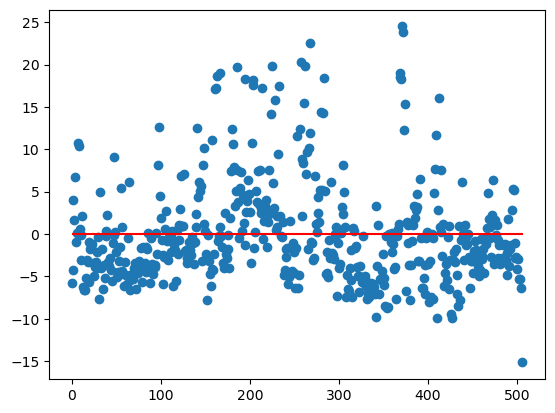

In [43]:
plt.scatter(
    x=model.resid.index,
    y=model.resid
)
plt.hlines(y=0, xmin=0, xmax=len(model.resid), colors='red')

변수 2개

In [45]:
model = sm.OLS.from_formula('target ~ LSTAT + RM', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          7.01e-112
Time:                        12:43:27   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
RM             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print(model.resid.mean())           # 단순평균을 통한 확인
print('-'*30)
print(ttest_1samp(model.resid, 0))  # 통계적 가설검정

-8.818593637496895e-15
------------------------------
TtestResult(statistic=-3.587619250878249e-14, pvalue=0.9999999999999714, df=505)


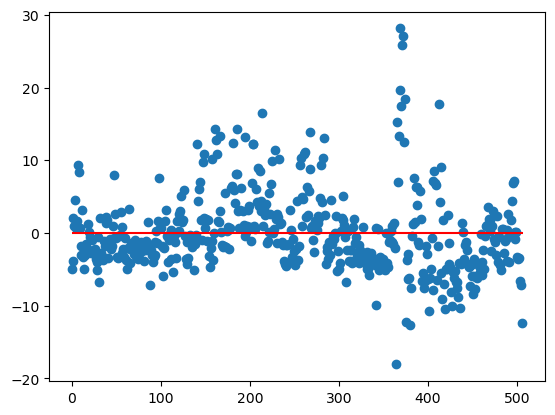

In [47]:
plt.scatter(
    x=model.resid.index,
    y=model.resid
)
plt.hlines(y=0, xmin=0, xmax=len(model.resid), colors='red')

변수 3개

In [51]:
# 변수 두 개 모델에 NOX를 추가하여 분석
model = sm.OLS.from_formula('target ~ LSTAT + RM + NOX', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.31e-110
Time:                        14:21:20   Log-Likelihood:                -1582.5
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7667      3.286     -0.233      0.816      -7.223       5.690
LSTAT         -0.6229      0.052    -11.994      0.000      -0.725      -0.521
RM             5.1243      0.447     11.471      0.000       4.247       6.002
NOX           -1.8456      2.651     -0.696      0.487      -7.053       3.362
==============================================================================
Omnibus:                      151.590   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.020
Skew:                           1.387   Prob(JB):                    1.44e-107
Kurtosis:                       6.955   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print(model.resid.mean())           # 단순평균을 통한 확인
print('-'*30)
print(ttest_1samp(model.resid, 0))  # 통계적 가설검정

-9.717303817114414e-15
------------------------------
TtestResult(statistic=-3.955145221427647e-14, pvalue=0.9999999999999685, df=505)


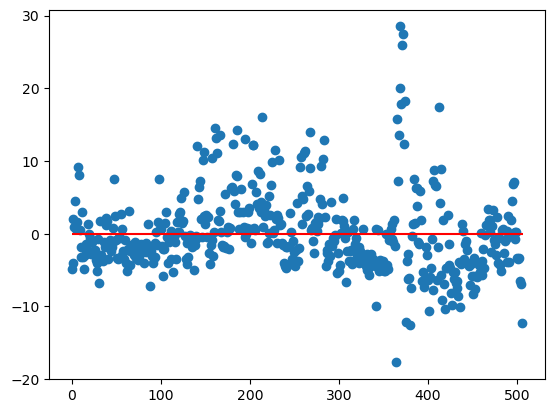

In [55]:
plt.scatter(
    x=model.resid.index,
    y=model.resid
)
plt.hlines(y=0, xmin=0, xmax=len(model.resid), colors='red')

In [56]:
# 변수 스케일링
model = sm.OLS.from_formula('target ~ scale(LSTAT) + scale(RM) + scale(NOX)', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.31e-110
Time:                        14:36:46   Log-Likelihood:                -1582.5
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.5328      0.246     91.440      0.000      22.049      23.017
scale(LSTAT)    -4.4436      0.370    -11.994      0.000      -5.172      -3.716
scale(RM)        3.5969      0.314     11.471      0.000       2.981       4.213
scale(NOX)      -0.2137      0.307     -0.696      0.487      -0.816       0.389
==============================================================================
Omnibus:                      151.590   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.020
Skew:                           1.387   Prob(JB):                    1.44e-107
Kurtosis:                       6.955   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

범주화

In [58]:
model = sm.OLS.from_formula('target ~ scale(LSTAT) + scale(RM) + scale(NOX) + C(CHAS)', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     235.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.48e-113
Time:                        14:41:20   Log-Likelihood:                -1572.7
No. Observations:                 506   AIC:                             3155.
Df Residuals:                     501   BIC:                             3177.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.2345      0.251     88.579      0.000      21.741      22.728
C(CHAS)[T.1.0]     4.3132      0.968      4.456      0.000       2.412       6.215
scale(LSTAT)      -4.3177      0.365    -11.835      0.000      -5.034      -3.601
scale(RM)          3.5141      0.308     11.395      0.000       2.908       4.120
scale(NOX)        -0.4129      0.305     -1.356      0.176      -1.011       0.185
==============================================================================
Omnibus:                      144.514   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.399
Skew:                           1.316   Prob(JB):                    4.34e-103
Kurtosis:                       6.928   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 변수 선택

모형 내의 변수를 선택하는 방법론 <br>

### 전진선택법

가장 유의한 변수부터 하나씩 추가해나가는 방법론

In [60]:
model = sm.OLS.from_formula('target ~ LSTAT', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        15:01:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
for column in boston.columns[:-1].difference(['LSTAT']):
    model = sm.OLS.from_formula(f'target ~ LSTAT + {column}', boston).fit()
    print(f'{column}|Adj R-squared: ', str(model.summary()).split('\n')[3].split('   ')[-1])

AGE|Adj R-squared:  0.549
B|Adj R-squared:  0.547
CHAS|Adj R-squared:  0.561
CRIM|Adj R-squared:  0.546
DIS|Adj R-squared:  0.560
INDUS|Adj R-squared:  0.545
NOX|Adj R-squared:  0.542
PTRATIO|Adj R-squared:  0.605
RAD|Adj R-squared:  0.543
RM|Adj R-squared:  0.637
TAX|Adj R-squared:  0.549
ZN|Adj R-squared:  0.546


In [92]:
model = sm.OLS.from_formula('target ~ LSTAT + RM', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          7.01e-112
Time:                        15:07:26   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
RM             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
for column in boston.columns[:-1].difference(['LSTAT', 'RM']):
    model = sm.OLS.from_formula(f'target ~ LSTAT + RM + {column}', boston).fit()
    print(f'{column}|Adj R-squared: ', str(model.summary()).split('\n')[3].split('   ')[-1])

AGE|Adj R-squared:  0.637
B|Adj R-squared:  0.648
CHAS|Adj R-squared:  0.649
CRIM|Adj R-squared:  0.644
DIS|Adj R-squared:  0.645
INDUS|Adj R-squared:  0.638
NOX|Adj R-squared:  0.637
PTRATIO|Adj R-squared:  0.677
RAD|Adj R-squared:  0.641
TAX|Adj R-squared:  0.646
ZN|Adj R-squared:  0.638


In [101]:
model = sm.OLS.from_formula(f'target ~ LSTAT + RM + PTRATIO', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          2.69e-123
Time:                        15:09:20   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.000      10.879      26.255
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
RM             4.5154      0.426     10.603      0.000       3.679       5.352
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
for column in boston.columns[:-1].difference(['LSTAT', 'RM', 'PTRATIO']):
    model = sm.OLS.from_formula(f'target ~ LSTAT + RM + PTRATIO + {column}', boston).fit()
    print(f'{column}|Adj R-squared: ', str(model.summary()).split('\n')[3].split('   ')[-1])

AGE|Adj R-squared:  0.678
B|Adj R-squared:  0.685
CHAS|Adj R-squared:  0.685
CRIM|Adj R-squared:  0.679
DIS|Adj R-squared:  0.688
INDUS|Adj R-squared:  0.676
NOX|Adj R-squared:  0.677
RAD|Adj R-squared:  0.676
TAX|Adj R-squared:  0.677
ZN|Adj R-squared:  0.676


In [106]:
model = sm.OLS.from_formula(f'target ~ LSTAT + RM + PTRATIO + DIS', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     279.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          5.23e-126
Time:                        15:10:32   Log-Likelihood:                -1543.7
No. Observations:                 506   AIC:                             3097.
Df Residuals:                     501   BIC:                             3118.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4714      4.078      6.001      0.000      16.459      32.483
LSTAT         -0.6654      0.047    -14.233      0.000      -0.757      -0.574
RM             4.2238      0.424      9.966      0.000       3.391       5.056
PTRATIO       -0.9736      0.116     -8.391      0.000      -1.202      -0.746
DIS           -0.5519      0.127     -4.348      0.000      -0.801      -0.303
==============================================================================
Omnibus:                      163.795   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.047
Skew:                           1.416   Prob(JB):                    1.05e-144
Kurtosis:                       7.840   Cond. No.                         430.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 후진제거법

완전모형으로부터 가장 유의하지 않은 변수를 하나씩 제거해나가는 방법론

In [115]:
model = sm.OLS.from_formula(f"target ~ {' + '.join(boston.columns[:-1])}", boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          6.72e-135
Time:                        15:14:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
model = sm.OLS.from_formula(f"target ~ {' + '.join(boston.columns[:-1])} - AGE", boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          6.08e-136
Time:                        15:17:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
model = sm.OLS.from_formula(f"target ~ {' + '.join(boston.columns[:-1])} - AGE - INDUS", boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          5.54e-137
Time:                        15:18:09   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
# 아래 formula에서 노가다를 뛰지 않고 scale과 C처리
model = sm.OLS.from_formula(f"target ~ {' + ' .join([''.join(['scale(', column, ')']) for column in boston.columns[:-1].difference(['AGE', 'INDUS', 'CHAS'])]) + ' + C(CHAS)'}", boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          5.54e-137
Time:                        15:31:30   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3448      0.219    102.178      0.000      21.915      22.774
C(CHAS)[T.1.0]     2.7187      0.854      3.183      0.002       1.040       4.397
scale(B)           0.8474      0.244      3.475      0.001       0.368       1.327
scale(CRIM)       -0.9316      0.282     -3.307      0.001      -1.485      -0.378
scale(DIS)        -3.1401      0.391     -8.037      0.000      -3.908      -2.372
scale(LSTAT)      -3.7279      0.338    -11.019      0.000      -4.393      -3.063
scale(NOX)        -2.0115      0.409     -4.915      0.000      -2.816      -1.207
scale(PTRATIO)    -2.0471      0.279     -7.334      0.000      -2.596      -1.499
scale(RAD)         2.6062      0.552      4.726      0.000       1.523       3.690
scale(RM)          2.6684      0.285      9.356      0.000       2.108       3.229
scale(TAX)        -1.9831      0.568     -3.493      0.001      -3.099      -0.867
scale(ZN)          1.0682      0.315      3.390      0.001       0.449       1.687
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                         9.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Pairwise

전진선택에서는 한 번 선택된 변수는 소거되지 않음 <br>
후진선택에서는 한 번 제거된 변수는 살아나지 않음 <br>
pairwise는 전진 선택으로 변수 선택 후 다시 유의성을 검증 <br>
유의하지 않은 변수를 제거 후(후진제거) 다시 변수 추가 (전진선택) <br>
위 방법을 반복하여 더 이상 변화가 없으면 중지 <br>

## 3.3 모형검증
만든 모델이 통계적으로 적절한 모델인지 확인하는 작업 <br>
아래의 4가지를 확인하는 절차를 가짐 <br>

### 선형성

독립 변수와 종속 변수 간에는 선형적 관계를 지니고 있어야 함 <br>
관계를 모형이 잘 파악했다면 오차에는 특정 패턴이 존재하지 않을 것 <br>

<br>

확인방법 <br>
- Plot <br>

<br>

만일 선형성을 만족하지 않을 경우 아래의 방법을 사용할 수 있음 <br>
- 새로운 변수 추가 <br>
- 변수 변환 <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ex) log, exp, sqrt, etc. <br>
- 선형성을 만족하지 않는 변수제거 <br>

<br>

<span style="font-size:150%">변환 예제</span> <br>

$Y$ = $\beta_0 + \beta_1log(X_1) + \epsilon$ <br>
log($Y$) = $\beta_0 + \beta_1X_1 + \epsilon$ <br>
log($Y$) = $\beta_0 + \beta_1$ log($X_1$) + $\epsilon$ <br>

<Axes: xlabel='LSTAT', ylabel='target'>

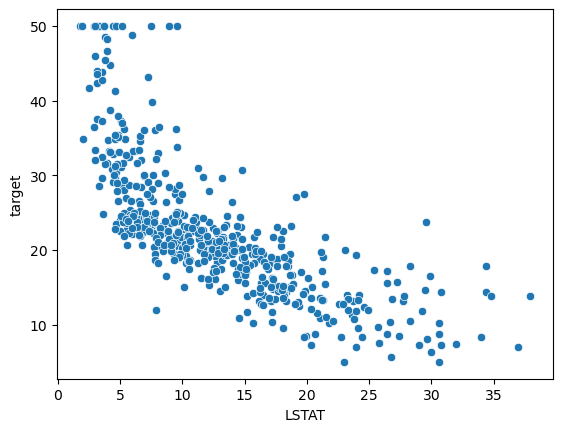

In [129]:
sns.scatterplot(
    boston,
    x='LSTAT',
    y='target'
)

### 정규성

회귀모델의 잔차가 정규분포를 따라야 한다는 가정

<br>

확인방법 <br>
- shapiro-wilk test
- QQ plot (scipy.stats.probplot)

<br>

정규성을 만족하지 않을 시 아래의 방법 사용 가능 <br>
- 변수 변환 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ex) box-cox transform
- Maximum Likelihood Estimation

<Axes: ylabel='Density'>

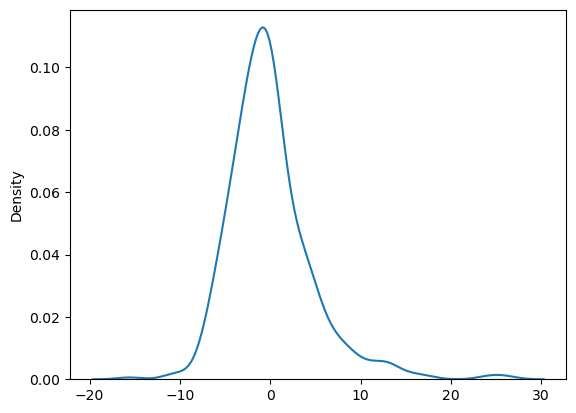

In [132]:
sns.kdeplot(model.resid)

((array([-2.99573567e+00, -2.71411028e+00, -2.55577619e+00, -2.44351800e+00,
         -2.35556494e+00, -2.28276382e+00, -2.22036495e+00, -2.16557440e+00,
         -2.11660431e+00, -2.07223893e+00, -2.03161265e+00, -1.99408648e+00,
         -1.95917475e+00, -1.92649942e+00, -1.89576017e+00, -1.86671438e+00,
         -1.83916307e+00, -1.81294098e+00, -1.78790928e+00, -1.76395019e+00,
         -1.74096288e+00, -1.71886034e+00, -1.69756695e+00, -1.67701655e+00,
         -1.65715093e+00, -1.63791855e+00, -1.61927361e+00, -1.60117517e+00,
         -1.58358651e+00, -1.56647453e+00, -1.54980933e+00, -1.53356377e+00,
         -1.51771316e+00, -1.50223493e+00, -1.48710847e+00, -1.47231481e+00,
         -1.45783653e+00, -1.44365756e+00, -1.42976302e+00, -1.41613915e+00,
         -1.40277318e+00, -1.38965322e+00, -1.37676820e+00, -1.36410778e+00,
         -1.35166231e+00, -1.33942275e+00, -1.32738062e+00, -1.31552796e+00,
         -1.30385728e+00, -1.29236155e+00, -1.28103411e+00, -1.26986869e+00,

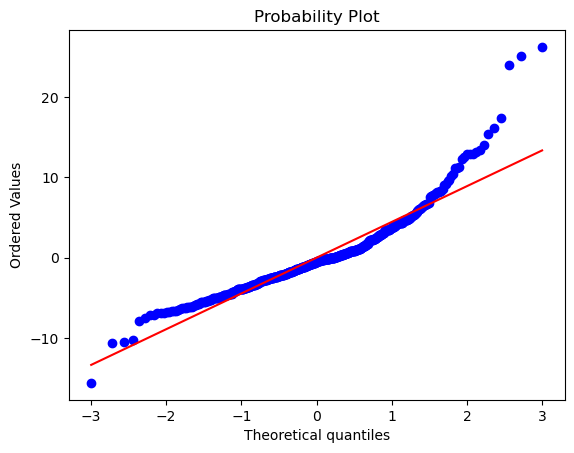

In [136]:
probplot(model.resid, dist='norm', plot=plt)

In [137]:
sp.stats.shapiro(model.resid)

ShapiroResult(statistic=0.9013077023849567, pvalue=1.4578134676642317e-17)

### 독립성

잔차간 상관관계가 없어야 한다는 가정 <br>
<br>

확인 방법
- Durbin Watson Test

<br>

- 회귀분석 결과의 durbin watson 통계량으로 확인
- 0~4 사이의 값을 가짐
- 2는 독립
- 0 ~ d 양의 상관관계
- 2+d ~ 4 음의 상관관계

In [139]:
statsmodels.stats.stattools.durbin_watson(model.resid)

1.0778750022758088

### 등분산성

회귀모델의 잔차가 고른 분산을 가지고 있어야 한다는 가정

<br>

확인 방법 <br>
- plot
- levene과 bartlett (파이썬에서 공식적인 방법은 아님)
  - levene: 정규분포 가정 <br>
  - bartlett: 모든 분포에 사용 <br>
<br>

등분산을 만족하지 않을 시 아래의 방법 사용 가능
- WLS regression
- GLS regression

<Axes: xlabel='None', ylabel='None'>

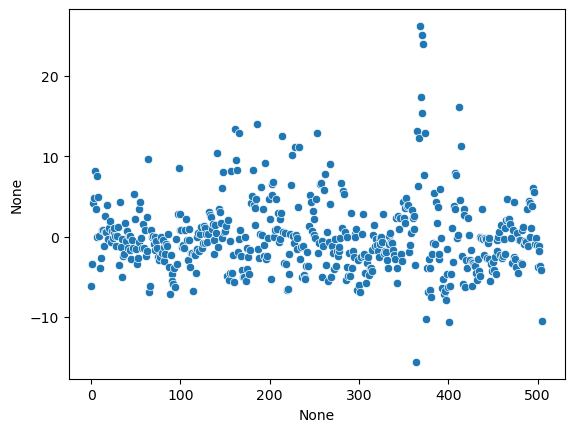

In [141]:
sns.scatterplot(
    x=model.resid.index,
    y=model.resid,
)

In [144]:
temp = boston.filter(items=['LSTAT', 'target'])

<Axes: xlabel='LSTAT', ylabel='target'>

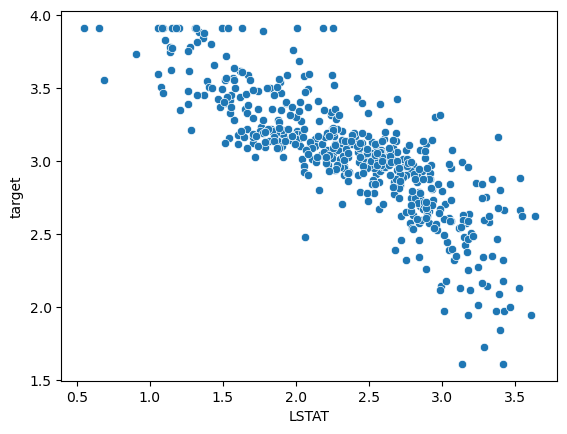

In [149]:
sns.scatterplot(
    x=np.log(temp.LSTAT),
    y=np.log(temp.target)
)

In [ ]:
temp.LSTAT = np.log(temp.LSTAT)
temp.target = np.log(temp.target)

<Axes: xlabel='LSTAT', ylabel='target'>

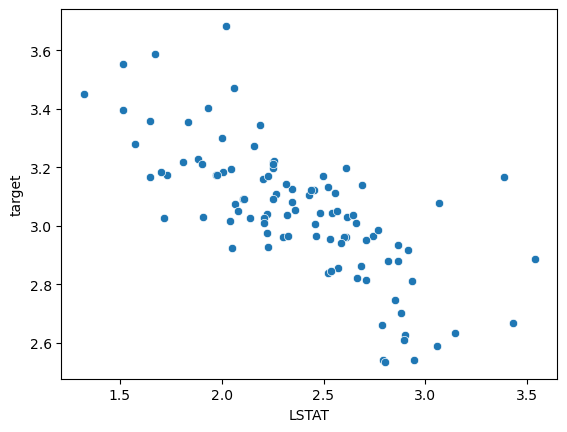

In [167]:
sns.scatterplot(
    temp.query('2.5 < target < 3.7 and LSTAT > 1').sample(n=100, random_state=1),
    x='LSTAT',
    y='target'
)

In [169]:
model = sm.OLS.from_formula(
    'target ~ LSTAT',
    temp.query('2.5 < target < 3.4 and 1 < LSTAT < 3.1').sample(n=100, random_state=1),
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     76.53
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           6.28e-14
Time:                        16:13:11   Log-Likelihood:                 48.530
No. Observations:                 100   AIC:                            -93.06
Df Residuals:                      98   BIC:                            -87.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7753      0.091     41.696      0.000       3.596       3.955
LSTAT         -0.3212      0.037     -8.748      0.000      -0.394      -0.248
==============================================================================
Omnibus:                        0.418   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.143
Skew:                           0.072   Prob(JB):                        0.931
Kurtosis:                       3.116   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

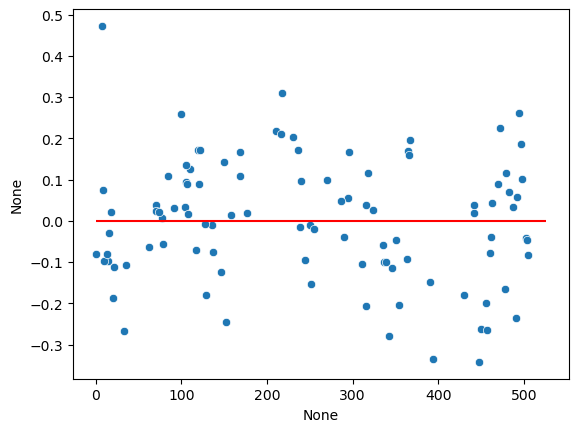

In [173]:
sns.scatterplot(
    x=model.resid.index,
    y=model.resid
)
plt.hlines(y=0, xmin=0, xmax=526, colors='red')

In [174]:
print(model.resid.mean())           # 단순평균을 통한 확인
print('-'*30)
print(ttest_1samp(model.resid, 0))  # 통계적 가설검정

-8.215650382226159e-16
------------------------------
TtestResult(statistic=-5.488588224869263e-14, pvalue=0.9999999999999563, df=99)


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

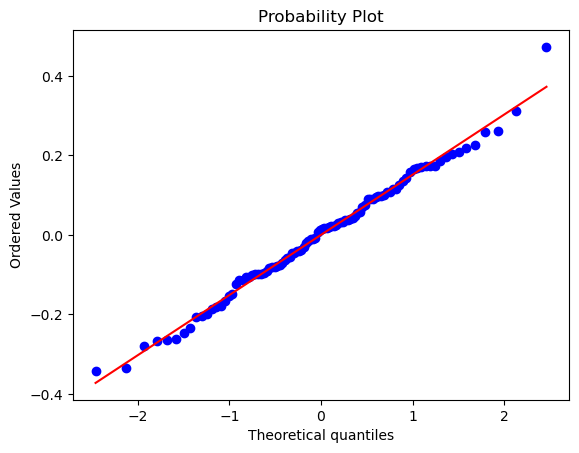

In [175]:
probplot(model.resid, dist='norm', plot=plt)

# 머신러닝 회귀분석

특별한 가정을 두지 않고 주어진 데이터에서 오차의 합이 최소가 되는 파라미터를 찾음

> ```python
> from sklearn.linear_model import LinearRegression
> 
> model = LinearRegression().fit(X, y)
> model.score(X, y) # R square
> model.predict(X)  # predict on X
> ```

In [176]:
model = LinearRegression().fit(boston.iloc[:, :-1], boston.target)

In [177]:
model.score(boston.iloc[:, :-1], boston.target)

0.7406426641094095

### Package

**전진선택법 (forward)**

어떤 변수도 고르지 않은 상태에서 시작 <br>
모든 변수를 하나씩 추출하여 모델에 cross-validation으로 학습 <br>
스코어(회귀: r2 / 분류: accuracy) 평균이 가장 높은 변수를 선택해 원소가 1개인 부분집합을 만듦. <br>
부분집합 + 뽑히지 않은 변수 1개의 모든 경우의 수에 대해 동일한 작업 시행 <br>
스코어 평균이 가장 높았던 조합을 선택하고 변수 부분집합에 해당 변수를 추가 <br>
변수가 사용자가 지정한 N개만큼 뽑힐 때까지 반복 <br>

<br>

**후진제거법 (backward)**

모든 변수를 포함한 상태에서 시작 <br>
전체에서 변수 하나씩 제거하여 학습 <br>
스코어 평균이 가장 높은 부분집합을 선택하고 해당 변수를 제거 <br>
변수가 사용자가 지정한 N개만큼 남을 때까지 반복 <br>


- 사용방법
> ```python
> sequential_feature_selector = SequentialFeatureSelector(
>   estimator=linear_regression,
>   direction='forward',
>   scoring='r2',
>   )
>
> sequential_feature_selector.support_  # 최종 선택된 변수 확인
> ```

In [178]:
sequential_feature_selector = SequentialFeatureSelector(
    estimator=model,
    direction='backward',
    scoring='r2'
).fit(boston.iloc[:, :-1], boston.iloc[:, -1])

In [184]:
model = LinearRegression().fit(
    boston.iloc[:, :-1].loc[:, sequential_feature_selector.support_],
    boston.iloc[:, -1]
)

model.score(
    boston.iloc[:, :-1].loc[:, sequential_feature_selector.support_],
    boston.iloc[:, -1]
)

0.6681812496901893

## LASSO (Least Absolute Shrinkage and Selection Operator)

규제항이 추가된 선형 회귀 <br>
규제항은 파라미터의 값을 loss에 추가하여 데이터가 과적합되는 것을 방지 <br>
덜 중요한 변수의 가중치를 0으로 만듦 <br>

$$ J(\theta) = MSE(\theta) + \alpha\Sigma^n_{i=1}|\beta_i| $$
$$ L = (Y-X\beta)^T(Y-X\beta) + \alpha||\beta||_1 $$
- $ \alpha $는 하이퍼파라미터로 모델을 얼마나 규제할지 조절
- 0일 경우 일반 선형회귀와 동일
- $ \alpha $가 아주 크면 가중치가 거의 0에 가까워지고, 데이터의 평균 직선으로 수렴

<br>

LASSO를 통한 모형 적합

<img src="https://velog.velcdn.com/images/jochedda/post/60bfb9c8-00bc-489e-8e9e-da2f6f1588d0/image.png" width="800" height="400"/>

<br>

- 사용 방법
> ```python
> from sklearn.linear_model import Lasso
>
> lasso = Lasso(alpha=1).fit(X, y)
> lasso.predict(X)
> ```

<br>

하이퍼파라미터의 영향을 많이 받기에 최적의 파라미터를 CV를 통해 선정
- 사용 방법
> ```python
> from sklearn.linear_model import Lasso, LassoCV
>
> alphas = np.arange(0.2, 10.2, 0.2)
> lasso = LassoCV(alphas=alphas).fit(X, y)
> lasso.predict(X)
> ```

In [185]:
lasso = Lasso().fit(boston.iloc[:, :-1], boston.iloc[:, -1])

In [186]:
lasso.coef_

array([-0.06343729,  0.04916467, -0.        ,  0.        , -0.        ,
        0.9498107 ,  0.02090951, -0.66879   ,  0.26420643, -0.01521159,
       -0.72296636,  0.00824703, -0.76111454])

In [191]:
boston.iloc[:, :-1].loc[:, np.where(lasso.coef_==0, True, False)]

,INDUS,CHAS,NOX
0,2.31,0.0,0.538
1,7.07,0.0,0.469
2,7.07,0.0,0.469
3,2.18,0.0,0.458
4,2.18,0.0,0.458
...,...,...,...
501,11.93,0.0,0.573
502,11.93,0.0,0.573
503,11.93,0.0,0.573
504,11.93,0.0,0.573


In [200]:
lasso = Lasso(alpha=2).fit(boston.iloc[:, :-1], boston.iloc[:, -1])
lasso.coef_

array([-0.02150337,  0.03552476, -0.        ,  0.        , -0.        ,
        0.        ,  0.04356327, -0.067749  ,  0.17316841, -0.01166801,
       -0.55700264,  0.00706404, -0.82155039])

In [201]:
lasso.score(boston.iloc[:, :-1], boston.iloc[:, -1])

0.6254704869379217

## Ridge

규제항이 추가된 선형 회귀 <br>
규제항은 파라미터의 값을 loss에 추가하여 데이터가 과적합되는 것을 방지 <br>
모든 계수가 0이되는 방향으로 수축 <br>
상관성을 가지는 변수들에 대해 pulling 이 되는 효과를 보임 <br>
-> 변수 선택 보다는 상관성이 있는 변수들에 대해 적절한 가중치 배분

<br>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png" width="600" height="400"/>

<br>

**Equation**
$$ L = (Y-X\beta)^T(Y-X\beta) + \alpha||\beta||_2^2 $$

<br>

- 사용 방법
> ```python
> from sklearn.linear_model import Ridge
>
> ridge = Ridge(alpha=1).fit(X, y)
> ridge.predict(X)
> ```

<br>

하이퍼파라미터의 영향을 많이 받기에 최적의 파라미터를 CV를 통해 선정
- 사용 방법
> ```python
> from sklearn.linear_model import Ridge, RidgeCV
>
> alphas = np.arange(0.2, 10.2, 0.2)
> ridge = RidgeCV(alphas=alphas).fit(X, y)
> ridge.predict(X)
> ```

In [204]:
ridge = Ridge(alpha=100).fit(boston.iloc[:, :-1], boston.iloc[:, -1])
ridge.coef_

array([-1.02201585e-01,  5.44964806e-02, -5.28263046e-02,  6.38334836e-01,
       -2.62847034e-01,  2.33453579e+00,  1.21168955e-03, -1.15338989e+00,
        3.15357579e-01, -1.58557572e-02, -8.29217879e-01,  9.39260996e-03,
       -6.60763828e-01])

## Elasticnet Regression

LASSO + Ridge

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_001.png" width="600" height="400"/>

<br>

$$ L = (Y-X\beta)^T(Y-X\beta) + \lambda(\alpha||\beta||_1 + \frac{1-\alpha}{2}||\beta||_2^2) $$

$\alpha$:1 -> LASSO <br>
$\alpha$:0 -> Ridge

- 사용 방법
> ```python
> from sklearn.linear_model import ElasticNet
>
> elastic_net = ElasticNet(alpha=1).fit(X, y)
> elastic_net.predict(X)
> ```

<br>

하이퍼파라미터의 영향을 많이 받기에 최적의 파라미터를 CV를 통해 선정
- 사용 방법
> ```python
> from sklearn.linear_model import ElasticNet, ElasticNetCV
>
> alphas = np.arange(0.2, 10.2, 0.2)
> elastic_net = ElasticNetCV(alphas=alphas).fit(X, y)
> elastic_net.predict(X)
> ```

In [207]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |
 |  Minimizes the objective function::
 |
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |
 |  where::
 |
 |          alpha = a + b and l1_ratio = a / (a + b)
 |
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha corresponds to

In [211]:
ridge = ElasticNet(l1_ratio=0.3, alpha=7).fit(boston.iloc[:, :-1], boston.iloc[:, -1])
ridge.coef_

array([-0.02560882,  0.04578602, -0.        ,  0.        , -0.        ,
        0.        ,  0.0360577 , -0.03318275,  0.11185145, -0.01175796,
       -0.23019025,  0.00747825, -0.70970649])

**Ridge vs Lasso vs Elasticnet**

|Ridge|LASSO|Elasticnet|
|-----|-----|----------|
|L2 norm|L1 norm|L1 + L2|
|변수 선택 불가능|변수 선택 가능|변수 선택 가능|
|Closed form solution 존재 (미분 이용)|Closed form solution이 존재하지 않음 (optimization 이용)|Closed form solution이 존재하지 않음 (optimization 이용)|
|변수 간 상관관계가 높은 상황에서 좋은 예측 성능|변수 간 상관관계가 높을 때 Ridge에 비해 에측 성능이 떨어짐|Ridge + LASSO|
|크기가 큰 변수를 우선적으로 줄이는 경향이 있음|비중요 변수를 우선적으로 줄임|Ridge + LASSO|

In [212]:
# Diamond
# carat이 0.3미만인 데이터에 대해서 
# cut, color, clarity, depth, table, x, y, z의 변수를 활용하여
# price 예측 모델링

In [217]:
diamonds = sns.load_dataset('diamonds').query('carat < 0.3').drop(columns=['carat'])

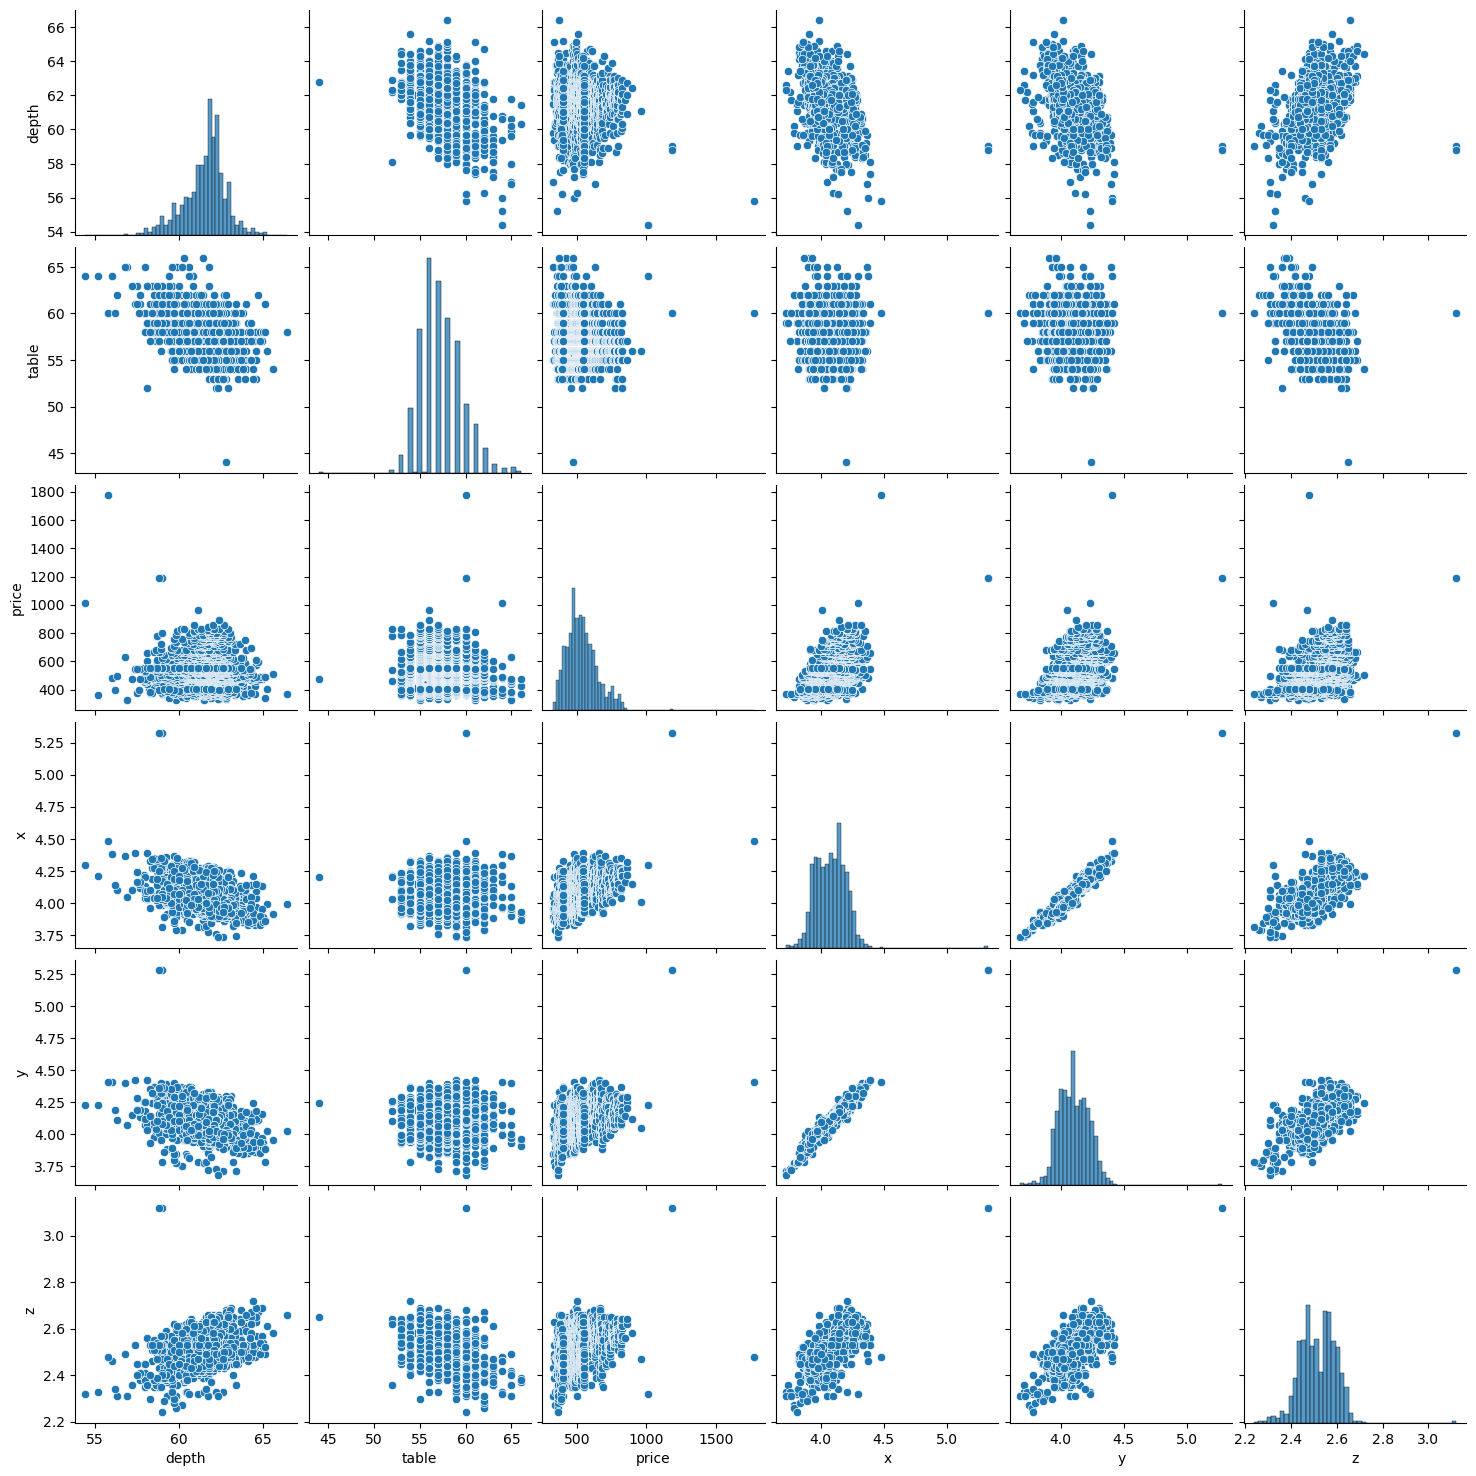

In [218]:
sns.pairplot(diamonds)

In [223]:
diamonds.iloc[:, 3:].corr()

,depth,table,price,x,y,z
depth,1.000000,-0.445097,-0.069005,-0.318438,-0.312676,0.381055
table,-0.445097,1.000000,-0.071336,-0.089533,-0.110509,-0.405968
price,-0.069005,-0.071336,1.000000,0.439769,0.375017,0.349780
x,-0.318438,-0.089533,0.439769,1.000000,0.974691,0.748185
y,-0.312676,-0.110509,0.375017,0.974691,1.000000,0.751957
z,0.381055,-0.405968,0.349780,0.748185,0.751957,1.000000


In [224]:
diamonds

,cut,color,clarity,depth,table,price,x,y,z
0,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
52966,Ideal,F,VVS2,61.1,57.0,552,4.03,4.06,2.47
52967,Ideal,F,VVS2,62.6,57.0,552,3.93,3.96,2.47
52968,Ideal,F,VVS2,61.8,56.0,552,3.97,4.02,2.47
52969,Ideal,F,VVS2,61.6,54.0,552,4.00,4.09,2.49


In [225]:
model = sm.OLS.from_formula('price ~ x + C(cut) + C(color) + C(clarity)', diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     201.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:46:12   Log-Likelihood:                -8934.7
No. Observations:                1599   AIC:                         1.791e+04
Df Residuals:                    1581   BIC:                         1.800e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1136.6157     56.993    -19.943      0.000   -1248.405   -1024.827
C(cut)[T.Premium]      -0.6376      6.170     -0.103      0.918     -12.741      11.466
C(cut)[T.Very Good]   -76.9488      3.895    -19.754      0.000     -84.590     -69.308
C(cut)[T.Good]       -104.0842      7.239    -14.378      0.000    -118.283     -89.885
C(cut)[T.Fair]        119.2243     23.361      5.103      0.000      73.402     165.047
C(color)[T.E]          -1.6368      5.571     -0.294      0.769     -12.563       9.290
C(color)[T.F]           3.6016      5.865      0.614      0.539      -7.903      15.106
C(color)[T.G]         -79.8181      6.760    -11.807      0.000     -93.078     -66.558
C(color)[T.H]        -113.5485      7.145    -15.893      0.000    -127.563     -99.534
C(color)[T.I]        -134.8852     10.733    -12.568      0.000    -155.937    -113.833
C(color)[T.J]        -175.7873     27.041     -6.501      0.000    -228.827    -122.748
C(clarity)[T.VVS1]    -17.0853      7.803     -2.189      0.029     -32.392      -1.779
C(clarity)[T.VVS2]    -30.3960      7.602     -3.998      0.000     -45.308     -15.484
C(clarity)[T.VS1]    -145.4356      7.913    -18.380      0.000    -160.956    -129.915
C(clarity)[T.VS2]    -154.1308      8.377    -18.399      0.000    -170.562    -137.700
C(clarity)[T.SI1]    -169.9726     11.188    -15.192      0.000    -191.917    -148.028
C(clarity)[T.SI2]    -129.6576     20.330     -6.378      0.000    -169.535     -89.780
C(clarity)[T.I1]             0          0        nan        nan           0           0
x                     445.3187     13.744     32.401      0.000     418.361     472.277
==============================================================================
Omnibus:                     1043.651   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68452.302
Skew:                           2.312   Prob(JB):                         0.00
Kurtosis:                      34.718   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""